### Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.gridspec as gridspec

In [2]:
surgery = pd.read_csv("ThoraricSurgery.csv")

In [3]:
surgery.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [4]:
surgery.tail()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
465,466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,469,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F
469,470,DGN3,4.72,3.56,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F


#### To remove warnings 

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Descriptive statistics

In [6]:
surgery.describe()

,id,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.281638,4.568702,62.534043
std,135.821574,0.871395,11.767857,8.706902
min,1.000000,1.440000,0.960000,21.000000
25%,118.250000,2.600000,1.960000,57.000000
50%,235.500000,3.160000,2.400000,62.000000
75%,352.750000,3.807500,3.080000,69.000000
max,470.000000,6.300000,86.300000,87.000000


### Number of rows and columns

In [7]:
surgery.shape

(470, 18)

In [8]:
duplicate_rows = surgery[surgery.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (0, 18)


### Understanding the data set

#### Description of the features in the dataset.

In [9]:
description = pd.read_excel('Thoracic surgery-description.xlsx').dropna()
description.style.set_properties(subset=['Description'])

,Attributes,Description
0,DGN,"Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1)"
1,PRE4,Forced Vital Capacity - FVC (numeric)
2,PRE5,Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)
3,PRE6,"Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)"
4,PRE7,"Pain before surgery (T,F)"
5,PRE8,"Haemoptysis before surgery (T,F)"
6,PRE9,"Dyspnoea before surgery (T,F)"
7,PRE10,"Cough before surgery (T,F)"
8,PRE11,"Weakness before surgery (T,F)"
9,PRE14,"T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)"


### Renaming the attributes of the dataset

In [10]:
col = ['ID','Diagnosis','Forced_Capacity','Forced_Expiration','Zubrod_scale','Pain','Haemoptysis','Dyspnoea',
       'Cough','Weakness','Size_of_tumor','Diabetes','MI_6months','PAD','Smoker','Asthmatic','Age','Risk_1year']
surgery.columns = col

In [11]:
surgery.head()

,ID,Diagnosis,Forced_Capacity,Forced_Expiration,Zubrod_scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,Diabetes,MI_6months,PAD,Smoker,Asthmatic,Age,Risk_1year
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


### Missing values

#### Checking the number of null values and data type of the variables present in the data set

In [12]:
surgery.isna().sum()

ID                   0
Diagnosis            0
Forced_Capacity      0
Forced_Expiration    0
Zubrod_scale         0
Pain                 0
Haemoptysis          0
Dyspnoea             0
Cough                0
Weakness             0
Size_of_tumor        0
Diabetes             0
MI_6months           0
PAD                  0
Smoker               0
Asthmatic            0
Age                  0
Risk_1year           0
dtype: int64

#### Calculating the number of missing vallues in each feature of the dataset

In [13]:
missing = surgery.isnull().sum()
missing_perc = (missing/len(surgery))*100
miss_val_table = pd.concat([missing, missing_perc], axis=1)
miss_val_table_rename_col = miss_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of MissingValues'})
miss_val_table_rename_col = miss_val_table_rename_col[miss_val_table_rename_col.iloc[:,1] != 0].sort_values('% of MissingValues', ascending=False).round(1)
print("Thoracic Surgery dataset has " + str(surgery.shape[1]) + " columns.\nThere are "+ str(miss_val_table_rename_col.shape[0]) + " columns that have missing values.")

Thoracic Surgery dataset has 18 columns.
There are 0 columns that have missing values.


#### Changing the values of the categorical variables, to improve the interpretation

In [14]:
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN1'] = 'Diagnosis_1'
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN2'] = 'Diagnosis_2'
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN3'] = 'Diagnosis_3'
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN4'] = 'Diagnosis_4'
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN5'] = 'Diagnosis_5'
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN6'] = 'Diagnosis_6'
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN8'] = 'Diagnosis_8'

surgery['Zubrod_scale'][surgery['Zubrod_scale'] == 'PRZ0'] = 'Zubrod_scale_0'
surgery['Zubrod_scale'][surgery['Zubrod_scale'] == 'PRZ1'] = 'Zubrod_scale_1'
surgery['Zubrod_scale'][surgery['Zubrod_scale'] == 'PRZ2'] = 'Zubrod_scale_2'

surgery['Pain'][surgery['Pain'] == 'F'] = 'False'
surgery['Pain'][surgery['Pain'] == 'T'] = 'True'

surgery['Haemoptysis'][surgery['Haemoptysis'] == 'F'] = 'False'
surgery['Haemoptysis'][surgery['Haemoptysis'] == 'T'] = 'True'

surgery['Dyspnoea'][surgery['Dyspnoea'] == 'F'] = 'False'
surgery['Dyspnoea'][surgery['Dyspnoea'] == 'T'] = 'True'

surgery['Cough'][surgery['Cough'] == 'F'] = 'False'
surgery['Cough'][surgery['Cough'] == 'T'] = 'True'

surgery['Weakness'][surgery['Weakness'] == 'F'] = 'False'
surgery['Weakness'][surgery['Weakness'] == 'T'] = 'True'

surgery['Diabetes'][surgery['Diabetes'] == 'F'] = 'False'
surgery['Diabetes'][surgery['Diabetes'] == 'T'] = 'True'

surgery['MI_6months'][surgery['MI_6months'] == 'F'] = 'False'
surgery['MI_6months'][surgery['MI_6months'] == 'T'] = 'True'


surgery['PAD'][surgery['PAD'] == 'F'] = 'False'
surgery['PAD'][surgery['PAD'] == 'T'] = 'True'


surgery['Smoker'][surgery['Smoker'] == 'F'] = 'False'
surgery['Smoker'][surgery['Smoker'] == 'T'] = 'True'

surgery['Asthmatic'][surgery['Asthmatic'] == 'F'] = 'False'
surgery['Asthmatic'][surgery['Asthmatic'] == 'T'] = 'True'

surgery['Risk_1year'][surgery['Risk_1year'] == 'F'] = 'False'
surgery['Risk_1year'][surgery['Risk_1year'] == 'T'] = 'True'

In [15]:
surgery.head()

,ID,Diagnosis,Forced_Capacity,Forced_Expiration,Zubrod_scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,Diabetes,MI_6months,PAD,Smoker,Asthmatic,Age,Risk_1year
0,1,Diagnosis_2,2.88,2.16,Zubrod_scale_1,False,False,False,True,True,OC14,False,False,False,True,False,60,False
1,2,Diagnosis_3,3.40,1.88,Zubrod_scale_0,False,False,False,False,False,OC12,False,False,False,True,False,51,False
2,3,Diagnosis_3,2.76,2.08,Zubrod_scale_1,False,False,False,True,False,OC11,False,False,False,True,False,59,False
3,4,Diagnosis_3,3.68,3.04,Zubrod_scale_0,False,False,False,False,False,OC11,False,False,False,False,False,54,False
4,5,Diagnosis_3,2.44,0.96,Zubrod_scale_2,False,True,False,True,True,OC11,False,False,False,True,False,73,True


### Displaying  data present in the csv file

In [16]:
surgery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 470 non-null    int64  
 1   Diagnosis          470 non-null    object 
 2   Forced_Capacity    470 non-null    float64
 3   Forced_Expiration  470 non-null    float64
 4   Zubrod_scale       470 non-null    object 
 5   Pain               470 non-null    object 
 6   Haemoptysis        470 non-null    object 
 7   Dyspnoea           470 non-null    object 
 8   Cough              470 non-null    object 
 9   Weakness           470 non-null    object 
 10  Size_of_tumor      470 non-null    object 
 11  Diabetes           470 non-null    object 
 12  MI_6months         470 non-null    object 
 13  PAD                470 non-null    object 
 14  Smoker             470 non-null    object 
 15  Asthmatic          470 non-null    object 
 16  Age                470 non

### Checking the data types

In [17]:
surgery.dtypes

ID                     int64
Diagnosis             object
Forced_Capacity      float64
Forced_Expiration    float64
Zubrod_scale          object
Pain                  object
Haemoptysis           object
Dyspnoea              object
Cough                 object
Weakness              object
Size_of_tumor         object
Diabetes              object
MI_6months            object
PAD                   object
Smoker                object
Asthmatic             object
Age                    int64
Risk_1year            object
dtype: object

### Finding number of unique values in each feature

In [18]:
surgery.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

ID     470
Age     45
dtype: int64

In [19]:
surgery.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

Forced_Capacity      134
Forced_Expiration    136
dtype: int64

In [20]:
surgery.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Diagnosis        7
Zubrod_scale     3
Pain             2
Haemoptysis      2
Dyspnoea         2
Cough            2
Weakness         2
Size_of_tumor    4
Diabetes         2
MI_6months       2
PAD              2
Smoker           2
Asthmatic        2
Risk_1year       2
dtype: int64

## Visualizations
#### Categorical Features

Categorical features are present in dataset:

1. Diagnosis
2. Zubrod_scale
3. Pain
4. Haemoptysis
5. Dyspnoea
6. Cough
7. Weakness
8. Size_of_tumor
9. Diabetes
10. MI_6months
11. PAD
12. Smoker
13. Asthmatic

#### Continuos Features
1. Forced_Capacity
2. Forced_Expiration
3. Age 


`Target Feature: Risk_1year`

#### Visualization of Categorical Features

In [21]:
#List to store column names of categorical features
cat_features=['Diagnosis','Zubrod_scale','Pain','Haemoptysis','Dyspnoea','Cough','Weakness','Size_of_tumor','Diabetes','MI_6months','PAD','Smoker','Asthmatic']
surgery.head()

,ID,Diagnosis,Forced_Capacity,Forced_Expiration,Zubrod_scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,Diabetes,MI_6months,PAD,Smoker,Asthmatic,Age,Risk_1year
0,1,Diagnosis_2,2.88,2.16,Zubrod_scale_1,False,False,False,True,True,OC14,False,False,False,True,False,60,False
1,2,Diagnosis_3,3.40,1.88,Zubrod_scale_0,False,False,False,False,False,OC12,False,False,False,True,False,51,False
2,3,Diagnosis_3,2.76,2.08,Zubrod_scale_1,False,False,False,True,False,OC11,False,False,False,True,False,59,False
3,4,Diagnosis_3,3.68,3.04,Zubrod_scale_0,False,False,False,False,False,OC11,False,False,False,False,False,54,False
4,5,Diagnosis_3,2.44,0.96,Zubrod_scale_2,False,True,False,True,True,OC11,False,False,False,True,False,73,True


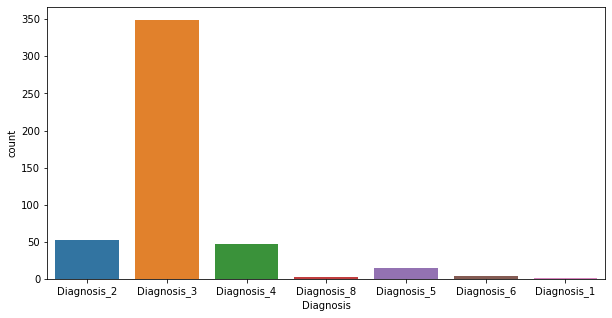

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='Diagnosis',data=surgery)

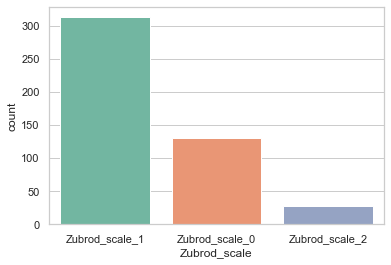

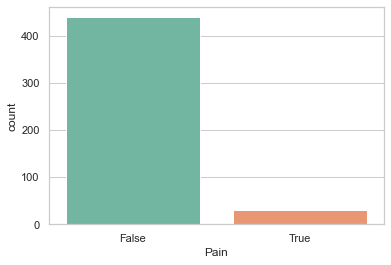

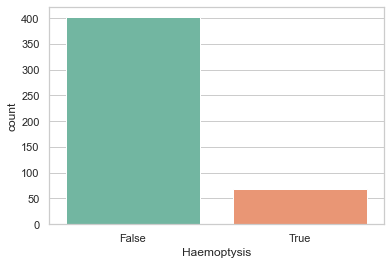

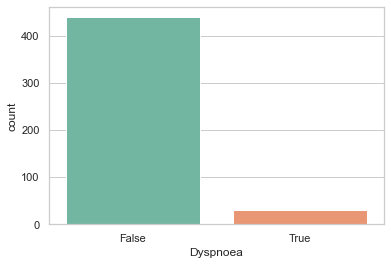

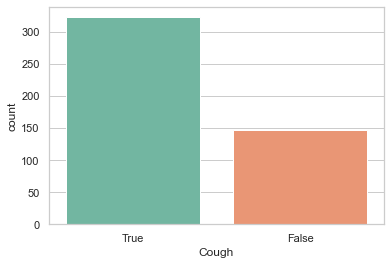

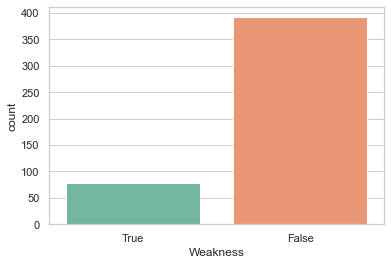

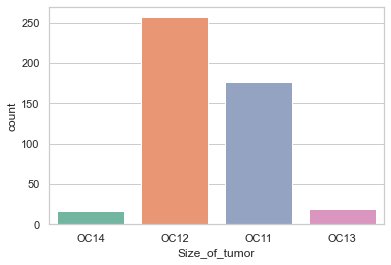

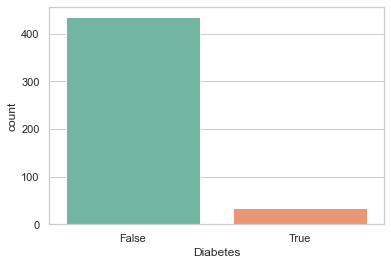

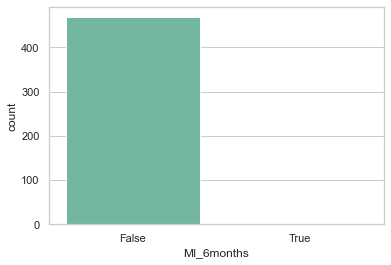

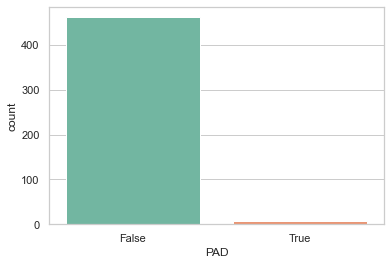

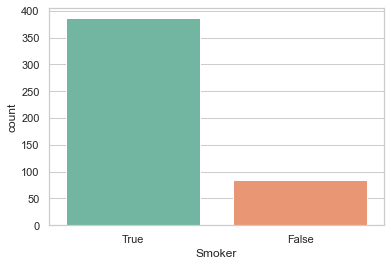

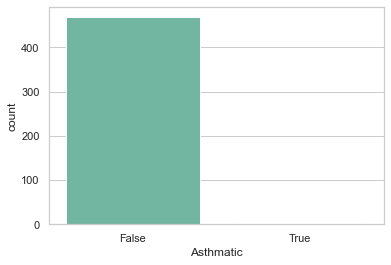

In [23]:
sns.set(style="whitegrid")
for i,cat in enumerate(cat_features[1:]):
    plt.figure(i)
    sns.countplot(x=cat,data=surgery,palette="Set2")

### Distribution of Continuous Feature. 

In [24]:
cont_features=['Forced_Capacity','Forced_Expiration','Age']

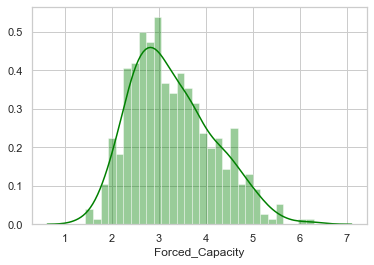

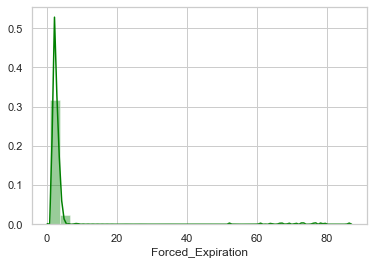

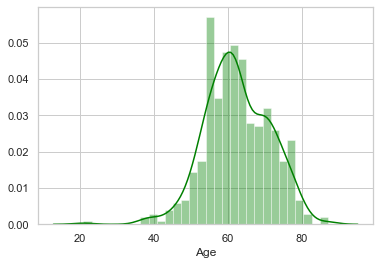

In [25]:
sns.set(style="whitegrid")
for i,cont in enumerate(cont_features):
    plt.figure(i)
    sns.distplot(surgery[cont],hist=True,bins=30,color="green")

### Relationship between Continuous features

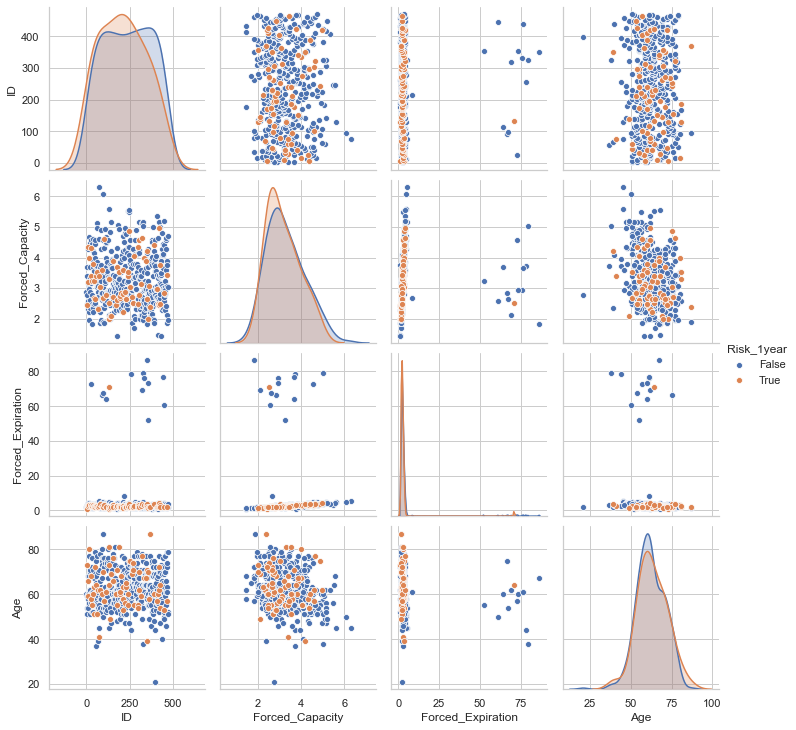

In [26]:
sns.pairplot(surgery,hue='Risk_1year' )

#### Box Plot to detect outliers in continuous features

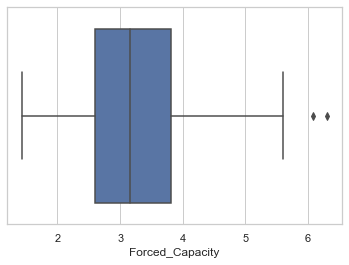

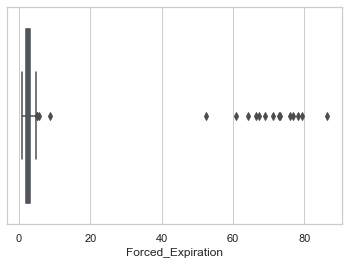

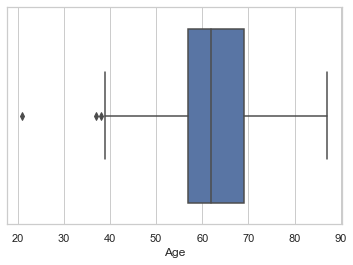

In [27]:
for i,cont in enumerate(cont_features):
    plt.figure(i)
    ax=sns.boxplot(x=cont,data=surgery)
    ax.plot

**Above Box plots depict there are outliers in all 3 continuous features. We can use different techniques to handle outliers.**

- Clamp Transformation can be used and check can be placed if it does not impact overall distribution.
- We can use standard Normalization of data betwen -1 and 1
- Binning

We can select the best approach after checking the impact on distribution after applying above 3 techniques.

## Distrbution of target feature

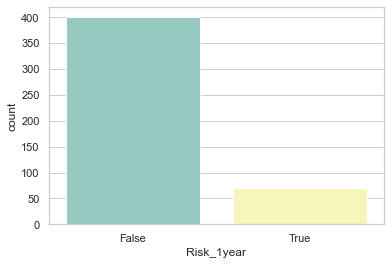

In [28]:
sns.countplot(x='Risk_1year',data=surgery,palette="Set3")

### There is huge gap in distribution of two levels in target feature. We can use "Over Sampling" Techniques to generate synthetic data for "True" Minority class.

#### Visualizing continuous and categorical features with target variable

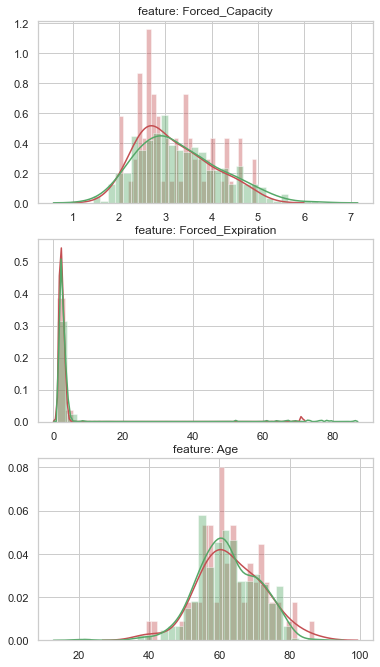

In [29]:
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(cont_features):
    ax = plt.subplot(gs[i])
    sns.distplot(surgery[col][surgery.Risk_1year == 'True'], bins=30, color='r')
    sns.distplot(surgery[col][surgery.Risk_1year == 'False'], bins=30, color='g')
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(col))
plt.show()

In [30]:
#Convert categorical features to numeric
surgery[['Pain','Haemoptysis','Dyspnoea','Cough','Weakness','Diabetes','MI_6months','PAD','Smoker','Asthmatic','Risk_1year']] = \
(surgery[['Pain','Haemoptysis','Dyspnoea','Cough','Weakness','Diabetes','MI_6months','PAD','Smoker','Asthmatic','Risk_1year']] == 'True').astype(int)


In [31]:
surgery['Diagnosis']= surgery['Diagnosis'].str[-1:].astype(int)
surgery['Zubrod_scale']= surgery['Zubrod_scale'].str[-1:].astype(int)
surgery['Size_of_tumor']= surgery['Size_of_tumor'].str[-1:].astype(int)

In [32]:
surgery.head()

,ID,Diagnosis,Forced_Capacity,Forced_Expiration,Zubrod_scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,Diabetes,MI_6months,PAD,Smoker,Asthmatic,Age,Risk_1year
0,1,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,2,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,4,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,5,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


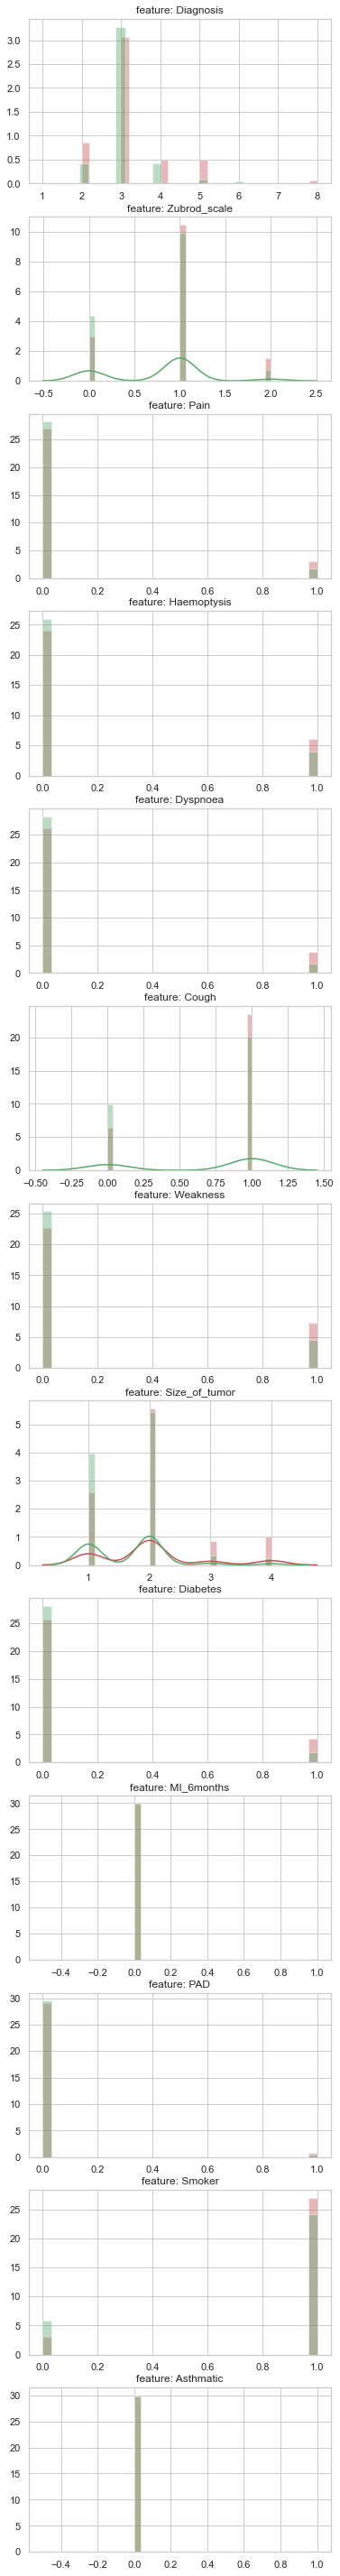

In [33]:
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(cat_features):
    ax = plt.subplot(gs[i])
    sns.distplot(surgery[col][surgery.Risk_1year == 1], bins=30, color='r')
    sns.distplot(surgery[col][surgery.Risk_1year == 0], bins=30, color='g')
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(col))
plt.show()

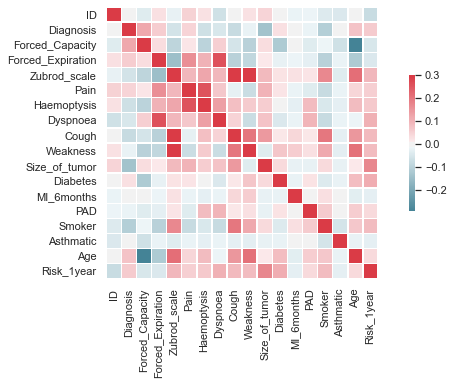

In [34]:
# Compute the correlation matrix
corr = surgery.corr()

f, ax = plt.subplots(figsize=(11, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Random Forest

In [35]:
surgery.head()

,ID,Diagnosis,Forced_Capacity,Forced_Expiration,Zubrod_scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,Diabetes,MI_6months,PAD,Smoker,Asthmatic,Age,Risk_1year
0,1,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,2,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,4,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,5,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [36]:
surgery[['Risk_1year']]

,Risk_1year
0,0
1,0
2,0
3,0
4,1
...,...
465,0
466,0
467,0
468,0


In [93]:
from sklearn.model_selection import train_test_split

X=surgery.iloc[:,1:-1]
Y=surgery[['Risk_1year']]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42) # 80% training and 20% test


In [106]:
from sklearn.ensemble import RandomForestClassifier

model_rnf = RandomForestClassifier(n_estimators=10,random_state=42 )
model_rnf.fit(X_train, y_train)

y_pred_rnf = model_rnf.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix, classification_report

In [108]:
model_rnf.score(X_test,y_test)

0.7978723404255319

In [109]:
print(classification_report(y_test, y_pred_rnf))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89        75
           1       0.50      0.05      0.10        19

    accuracy                           0.80        94
   macro avg       0.65      0.52      0.49        94
weighted avg       0.74      0.80      0.73        94



### Using feature importance for Random forest

In [110]:
import pandas as pd
feature_imp = pd.Series(model_rnf.feature_importances_).sort_values(ascending=False)
feature_imp

1     0.226615
2     0.218834
15    0.168681
0     0.091373
9     0.084579
5     0.031406
6     0.029480
3     0.025860
7     0.025372
8     0.025060
10    0.022487
13    0.019672
4     0.019148
12    0.011429
11    0.000005
14    0.000000
dtype: float64

In [111]:
X

,Diagnosis,Forced_Capacity,Forced_Expiration,Zubrod_scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,Diabetes,MI_6months,PAD,Smoker,Asthmatic,Age
0,0.142857,0.296296,0.014061,0.5,0,0,0,1,1,1.000000,0,0,0,1,0,0.590909
1,0.285714,0.403292,0.010780,0.0,0,0,0,0,0,0.333333,0,0,0,1,0,0.454545
2,0.285714,0.271605,0.013124,0.5,0,0,0,1,0,0.000000,0,0,0,1,0,0.575758
3,0.285714,0.460905,0.024373,0.0,0,0,0,0,0,0.000000,0,0,0,0,0,0.500000
4,0.285714,0.205761,0.000000,1.0,0,1,0,1,1,0.000000,0,0,0,1,0,0.787879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,0.142857,0.502058,0.013593,0.5,0,0,0,1,0,0.666667,0,0,0,1,0,0.636364
466,0.285714,0.477366,0.025311,0.0,0,0,0,0,0,0.000000,0,0,0,1,0,0.606061
467,0.285714,0.329218,0.013124,0.5,0,0,0,1,0,0.666667,0,0,0,0,0,0.469697
468,0.285714,0.106996,0.008437,0.5,0,0,0,1,1,0.333333,0,0,0,1,0,0.878788


### Removing least important features

In [112]:
X_new=X[['Diagnosis','Forced_Capacity','Forced_Expiration','Pain','Zubrod_scale','Haemoptysis','Dyspnoea','Cough','Weakness','Size_of_tumor','Diabetes','Age','Smoker']]

In [118]:
# Split dataset into training set and test set
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(X_new, Y, test_size=0.2,random_state=42) # 70% training and 30% test

In [151]:
model_rnf_ft = RandomForestClassifier(n_estimators=300,random_state=42)
model_rnf_ft.fit(X_train_ft, y_train_ft)

y_pred_rnf_ft = model_rnf_ft.predict(X_test_ft)

In [152]:
from sklearn.metrics import confusion_matrix, classification_report
cmf_ft=confusion_matrix(y_test_ft,y_pred_rnf_ft)
cmf_ft

array([[75,  0],
       [19,  0]], dtype=int64)

In [153]:
model_rnf_ft.score(X_test_ft,y_test_ft)

0.7978723404255319

In [154]:
print(classification_report(y_test_ft, y_pred_rnf_ft))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        75
           1       0.00      0.00      0.00        19

    accuracy                           0.80        94
   macro avg       0.40      0.50      0.44        94
weighted avg       0.64      0.80      0.71        94



In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

#### Data Scaling 

Some columns like Diagnosis,Forced_Capacity,Forced_Expiration etc. are not scaled with remaining columns. Hence, performed min-max normalization on these features.

In [39]:
surgery['Diagnosis']= preprocessing.MinMaxScaler().fit_transform(surgery[['Diagnosis']])
surgery['Forced_Capacity']= preprocessing.MinMaxScaler().fit_transform(surgery[['Forced_Capacity']])
surgery['Forced_Expiration']= preprocessing.MinMaxScaler().fit_transform(surgery[['Forced_Expiration']])
surgery['Zubrod_scale']= preprocessing.MinMaxScaler().fit_transform(surgery[['Zubrod_scale']])
surgery['Size_of_tumor']= preprocessing.MinMaxScaler().fit_transform(surgery[['Size_of_tumor']])
surgery['Age']= preprocessing.MinMaxScaler().fit_transform(surgery[['Age']])

In [40]:
X=surgery.iloc[:,1:-1]

Y=surgery[['Risk_1year']]

### Modeling and Evaluation

In [41]:
#parameters to fine tune the models
knn_params = {'n_neighbors': list(range(2, 6, 1)),'weights':['uniform','distance'],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
svc_params = {'C': [0.01, 0.7, 0.9, 1,10,100], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
dec_tree_params = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(2, 6, 1)), 'min_samples_leaf': list(range(5, 8, 1))}
log_reg_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]}
nb_params= {'var_smoothing' : [0.00001,0.0000001]}
rf_params={'criterion': ['gini', "entropy"],'max_depth': list(range(2, 6, 1)), 'min_samples_leaf': list(range(5, 8, 1))}


# different classifiers we want to try for the problem 
classifiers = {
    
    "KNearest": (KNeighborsClassifier(), knn_params),
    "Support Vector Classifier": (SVC(), svc_params),
    "DecisionTreeClassifier": (DecisionTreeClassifier(), dec_tree_params),
    "Naive Bayes": (GaussianNB(), nb_params),
    "Random forests": (RandomForestClassifier(),rf_params),
    "LogisiticRegression": (LogisticRegression(), log_reg_params)
}

#Selecting candidate parameters using gridsearch to train the model
def get_best_fit(model, params, X, Y):
    grid = GridSearchCV(estimator=model, param_grid=params)
    grid.fit(X, Y)
    return grid.best_estimator_

# Algorithm to train all models
# We have implemented stratified k-fold cross validation approach and split the dataset into k equal folds
# The model is trained using (k-1) of the folds as training data and the remaining one as test data
def train_all_models(X, Y, folds=5):
    RANDOM_SEED = 0
    for clf_name, (clf, params) in classifiers.items():
        skf = StratifiedKFold(n_splits=folds, random_state=RANDOM_SEED, shuffle=True)
        cv_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []
        estimators = []
        for train_index, test_index in skf.split(X, Y):
            X_train, X_test = pd.DataFrame(data=X, index=train_index), pd.DataFrame(data=X, index=test_index)
            y_train, y_test = pd.DataFrame(data=Y, index=train_index), pd.DataFrame(data=Y, index=test_index)
            model= get_best_fit(clf, params, X_train, y_train)
            estimators.append(model) 
            scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=3, scoring='accuracy')  #compute the score 3 consecutive times
            cv_scores.append(scores)     
            y_pred = model.predict(X_test)
            precision_scores.append(precision_score(y_test, y_pred))
            recall_scores.append(recall_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))
        print('============================= {} ============================='.format(clf_name))
        print('Accuracy score:\n', accuracy_score(y_test, y_pred))
        print()
        print('Confusion matrix:\n', confusion_matrix(y_test, y_pred)) 
        print()
        print('Classification report:\n', classification_report(y_test, y_pred))
        print()
        print('Mean cross validation score: {}'.format(np.array([cv_scores]).mean()))
        print('Mean precision score: {}'.format(np.array([precision_scores]).mean()))
        print('Mean Recall score: {}'.format(np.array([recall_scores]).mean()))
        print('Mean F1 score: {}'.format(np.array([f1_scores]).mean()))
        best_iteration = recall_scores.index(max(recall_scores))
        best_estimator = estimators[best_iteration]
        print('Best estimator: {}'.format(estimators[best_iteration]))

In [42]:
train_all_models(X, Y)

============================= KNearest =============================
Accuracy score:
 0.851063829787234

Confusion matrix:
 [[80  0]
 [14  0]]

Classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        80
           1       0.00      0.00      0.00        14

    accuracy                           0.85        94
   macro avg       0.43      0.50      0.46        94
weighted avg       0.72      0.85      0.78        94


Mean cross validation score: 0.8446814814814816
Mean precision score: 0.0
Mean Recall score: 0.0
Mean F1 score: 0.0
Best estimator: KNeighborsClassifier(n_neighbors=4)
============================= Support Vector Classifier =============================
Accuracy score:
 0.851063829787234

Confusion matrix:
 [[80  0]
 [14  0]]

Classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        80
           1       0.00      0.00      0.0

In [123]:
# Use feature reduction dataset to train the models
train_all_models(X_new, Y)

============================= KNearest =============================
Accuracy score:
 0.851063829787234

Confusion matrix:
 [[80  0]
 [14  0]]

Classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        80
           1       0.00      0.00      0.00        14

    accuracy                           0.85        94
   macro avg       0.43      0.50      0.46        94
weighted avg       0.72      0.85      0.78        94


Mean cross validation score: 0.8473396825396827
Mean precision score: 0.0
Mean Recall score: 0.0
Mean F1 score: 0.0
Best estimator: KNeighborsClassifier(n_neighbors=4)
============================= Support Vector Classifier =============================
Accuracy score:
 0.8617021276595744

Confusion matrix:
 [[80  0]
 [13  1]]

Classification report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        80
           1       1.00      0.07      0.

#### Results:
>1. We observed after feature reduction, there is not much difference in accuracy for the models such as KNN, SVC, Random forest and Logistic Regression.
>2. But for decision tree model the accuracy has improved from 79% to 85% while for naive bayes there is a significant increase in accuracy observed from 22% to 76%.

### Performing Evaluation using oversampling as target feature is imbalanced

In [48]:
from imblearn.over_sampling import SMOTE 

In [90]:
def train_smote_all_models(X, Y, folds=5):
    RANDOM_SEED = 0
    for clf_name, (clf, params) in classifiers.items():
        skf = StratifiedKFold(n_splits=folds, random_state=RANDOM_SEED, shuffle=True)
        cv_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []
        estimators = []
        for train_index, test_index in skf.split(X, Y):
            X_train, X_test = pd.DataFrame(data=X, index=train_index), pd.DataFrame(data=X, index=test_index)
            y_train, y_test = pd.DataFrame(data=Y, index=train_index), pd.DataFrame(data=Y, index=test_index)
            #Over Sampling Using SMOTE before validation
            sm = SMOTE(random_state = 42) 
            X_train_smo, y_train_smo = sm.fit_sample(X_train, y_train) 
            model= get_best_fit(clf, params, X_train_smo, y_train_smo)
            estimators.append(model) 
            scores = cross_val_score(model, X_train_smo, y_train_smo.values.ravel(), cv=3, scoring='accuracy')  #compute the score 3 consecutive times
            cv_scores.append(scores)     
            y_pred = model.predict(X_test)
            precision_scores.append(precision_score(y_test, y_pred))
            recall_scores.append(recall_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))
        print('============================= {} ============================='.format(clf_name))
        print('Accuracy score:\n', accuracy_score(y_test, y_pred))
        print()
        print('Confusion matrix:\n', confusion_matrix(y_test, y_pred)) 
        print()
        print('Classification report:\n', classification_report(y_test, y_pred))
        print()
        print('Mean cross validation score: {}'.format(np.array([cv_scores]).mean()))
        print('Mean precision score: {}'.format(np.array([precision_scores]).mean()))
        print('Mean Recall score: {}'.format(np.array([recall_scores]).mean()))
        print('Mean F1 score: {}'.format(np.array([f1_scores]).mean()))
        best_iteration = recall_scores.index(max(recall_scores))
        best_estimator = estimators[best_iteration]
        print('Best estimator: {}'.format(estimators[best_iteration]))

In [92]:
train_smote_all_models(X, Y)

============================= KNearest =============================
Accuracy score:
 0.6914893617021277

Confusion matrix:
 [[62 18]
 [11  3]]

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81        80
           1       0.14      0.21      0.17        14

    accuracy                           0.69        94
   macro avg       0.50      0.49      0.49        94
weighted avg       0.74      0.69      0.72        94


Mean cross validation score: 0.7946777236628493
Mean precision score: 0.1933095238095238
Mean Recall score: 0.2857142857142857
Mean F1 score: 0.22509319908334685
Best estimator: KNeighborsClassifier(n_neighbors=3, weights='distance')
============================= Support Vector Classifier =============================
Accuracy score:
 0.5212765957446809

Confusion matrix:
 [[44 36]
 [ 9  5]]

Classification report:
               precision    recall  f1-score   support

           0       0.83     

##  Even though without oversampling we were getting better accuracy(85%) but it did not handled imbalanced dataset and model will eventually fail in generalizing.Hence, there is a need to handle this issue. AFter appling oversampling when using SMOTE, "KNN" turns out to be the best model with n=3 and weight=distance

In [155]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42) # 80% training and 20% test

In [156]:
sm = SMOTE(random_state = 42) 
X_train_smo, y_train_smo = sm.fit_sample(X_train, y_train) 

In [157]:
print("Before Oversampling, size of training dataset:",y_train.shape) 
print("After Oversampling, size of training dataset:",y_train_smo.shape) 

Before Oversampling, size of training dataset: (376, 1)
After Oversampling, size of training dataset: (650, 1)


In [158]:
print("Before Oversampling, size of training dataset:",X_train.shape) 
print("After Oversampling, size of training dataset:",X_train_smo.shape) 

Before Oversampling, size of training dataset: (376, 16)
After Oversampling, size of training dataset: (650, 16)


In [163]:
# Checking performance using undersampling
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 

In [159]:
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train)

In [160]:
knn=KNeighborsClassifier(n_neighbors=3, weights='distance')

In [161]:
knn.fit(X_train_miss, y_train_miss)
y_pred=knn.predict(X_test)

In [162]:
print(accuracy_score(y_test, y_pred)) 

0.3404255319148936


### Undersampling decreases perfromance , hence SMOTE using KNN is our best model